In [25]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

!pip install xgboost


In [26]:
data = pd.read_csv('train.csv')
data.head(4)

,Gender,Age,Income,Income Stability,Loan Amount Request,Current Loan,Dependents,Credit Score,Co-Applicant,Property Price,Loan Amount
0,F,56,1933.05,Low,72809.58,241.08,3.0,809.44,1,119933.46,54607.18
1,M,32,4952.91,Low,46837.47,495.81,1.0,780.40,1,54791.00,37469.98
2,F,65,988.19,High,45593.04,171.95,1.0,833.15,0,72440.58,36474.43
3,F,65,NaN,High,80057.92,298.54,2.0,832.70,1,121441.51,56040.54


In [27]:
data.isnull().sum()

Gender                   53
Age                       0
Income                 4576
Income Stability       1683
Loan Amount Request       0
Current Loan            172
Dependents             2493
Credit Score           1703
Co-Applicant              0
Property Price            0
Loan Amount             339
dtype: int64

In [28]:
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage

Gender                  0.176667
Age                     0.000000
Income                 15.253333
Income Stability        5.610000
Loan Amount Request     0.000000
Current Loan            0.573333
Dependents              8.310000
Credit Score            5.676667
Co-Applicant            0.000000
Property Price          0.000000
Loan Amount             1.130000
dtype: float64

In [29]:
mode_col = ['Gender', 'Income Stability', 'Dependents', 'Co-Applicant']
mean_col = data.columns.drop(mode_col, errors='ignore')


mean_col  # Display the updated mean_col


Index(['Age', 'Income', 'Loan Amount Request', 'Current Loan ', 'Credit Score',
       'Property Price', 'Loan Amount'],
      dtype='object')

In [30]:
for col in mode_col:
    data[col] = data[col].fillna(data[col].mode()[0])

for i in mean_col:
    data[i] = data[i].fillna(data[i].mean())

data.isnull().sum()

Gender                 0
Age                    0
Income                 0
Income Stability       0
Loan Amount Request    0
Current Loan           0
Dependents             0
Credit Score           0
Co-Applicant           0
Property Price         0
Loan Amount            0
dtype: int64

In [31]:
replace_col = ['Income',  'Loan Amount Request', 'Current Loan ', 'Credit Score', 'Co-Applicant', 'Property Price', 'Loan Amount']
for col in replace_col:
    # Replace '?' and -999 with 0 in each column
    data[col] = data[col].replace(['?', -999], 0)


In [32]:
count = (data['Loan Amount'] == 0).sum()
count /len(data) *100

np.float64(27.346666666666668)

In [33]:
def approved_loan(amount): 
    if amount == 0 : 
        return 'No'
    else :
        return 'Yes'

In [34]:
data['Approved'] = data['Loan Amount'].apply(approved_loan)

In [35]:
data['Approved'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
data.describe()

,Age,Income,Loan Amount Request,Current Loan,Dependents,Credit Score,Co-Applicant,Property Price,Loan Amount
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000
mean,40.092300,2.630574e+03,88826.333855,406.830976,2.232000,739.885381,0.850533,1.317714e+05,47658.991144
std,16.045129,1.036820e+04,59536.949605,218.726634,0.913457,70.085602,0.356554,9.353297e+04,47936.589717
min,18.000000,3.777000e+02,6048.240000,0.000000,1.000000,580.000000,0.000000,0.000000e+00,0.000000
25%,25.000000,1.743305e+03,41177.755000,248.655000,2.000000,685.415000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.473470e+03,75128.075000,376.505000,2.000000,739.885381,1.000000,1.099936e+05,36064.225000
75%,55.000000,2.869142e+03,119964.605000,520.102500,3.000000,795.140000,1.000000,1.788807e+05,73763.532500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.077967e+06,481907.320000


In [37]:
def categorize_age(age):
    if age < 26:
        return "Young";
    elif age < 51: 
        return 'Middle Aged';
    else: return 'Senior'

In [38]:
data['Age'] = data['Age'].apply(categorize_age)

In [39]:
data['Age'].value_counts()

Age
Middle Aged    12471
Senior          9698
Young           7831
Name: count, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30000 non-null  object 
 1   Age                  30000 non-null  object 
 2   Income               30000 non-null  float64
 3   Income Stability     30000 non-null  object 
 4   Loan Amount Request  30000 non-null  float64
 5   Current Loan         30000 non-null  float64
 6   Dependents           30000 non-null  float64
 7   Credit Score         30000 non-null  float64
 8   Co-Applicant         30000 non-null  int64  
 9   Property Price       30000 non-null  float64
 10  Loan Amount          30000 non-null  float64
 11  Approved             30000 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.7+ MB


In [41]:
data.head(4)

,Gender,Age,Income,Income Stability,Loan Amount Request,Current Loan,Dependents,Credit Score,Co-Applicant,Property Price,Loan Amount,Approved
0,F,Senior,1933.050000,Low,72809.58,241.08,3.0,809.44,1,119933.46,54607.18,Yes
1,M,Middle Aged,4952.910000,Low,46837.47,495.81,1.0,780.40,1,54791.00,37469.98,Yes
2,F,Senior,988.190000,High,45593.04,171.95,1.0,833.15,0,72440.58,36474.43,Yes
3,F,Senior,2630.574417,High,80057.92,298.54,2.0,832.70,1,121441.51,56040.54,Yes


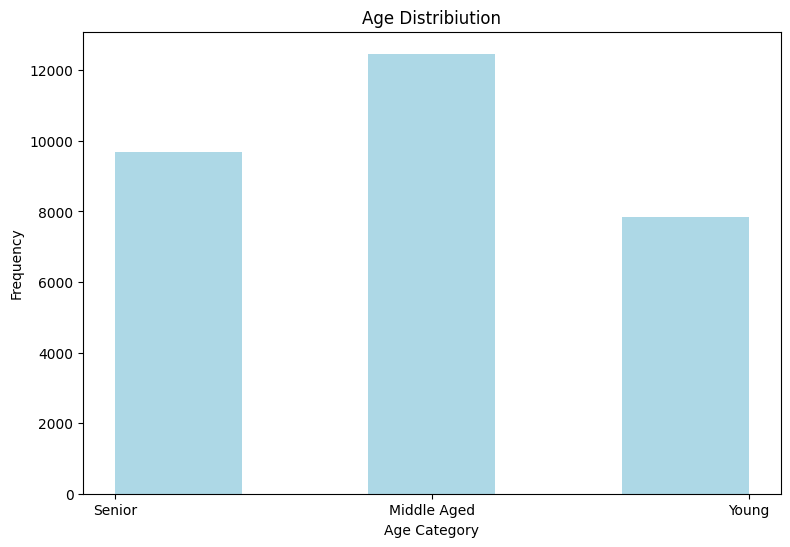

In [42]:
plt.figure(figsize= (9,6))
plt.hist(data['Age'], color='lightblue', bins=5)
plt.title("Age Distribiution")
plt.xlabel("Age Category")
plt.ylabel("Frequency")
plt.show()

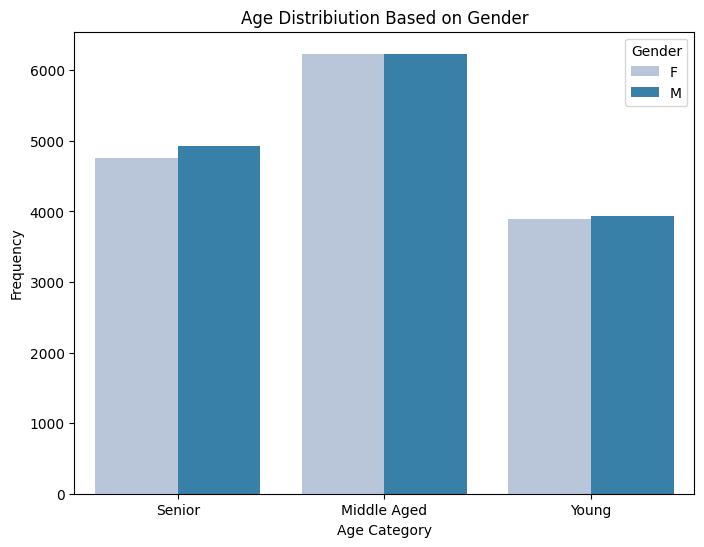

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(data,x = 'Age', hue = "Gender", palette='PuBu')
plt.title("Age Distribiution Based on Gender")
plt.xlabel("Age Category")
plt.ylabel("Frequency")
plt.show()

<Figure size 1000x600 with 0 Axes>

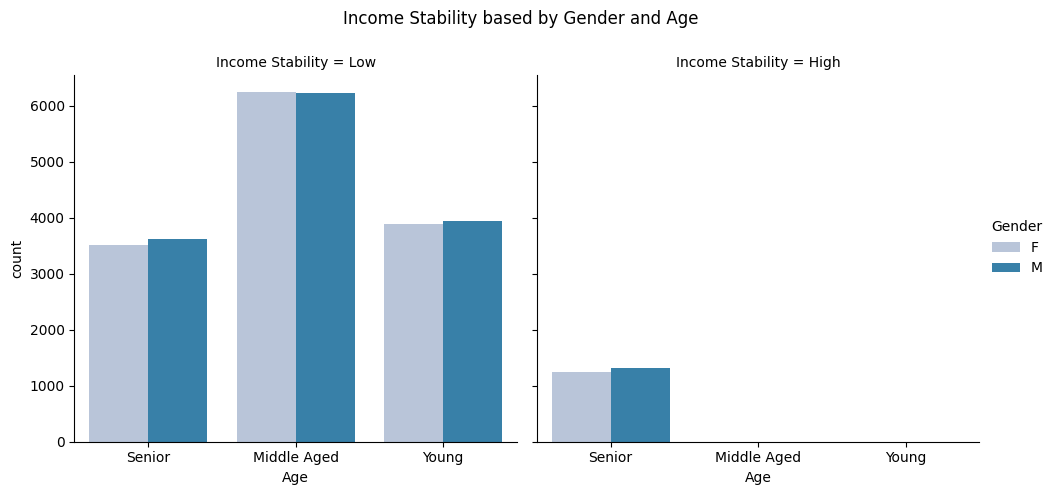

In [44]:
plt.figure(figsize=(10,6))
sns.catplot(data, x = 'Age', hue="Gender", col = 'Income Stability', kind="count",  height=5,aspect=1, palette='PuBu')
plt.subplots_adjust(top = 0.85)
plt.suptitle("Income Stability based by Gender and Age")
plt.show()

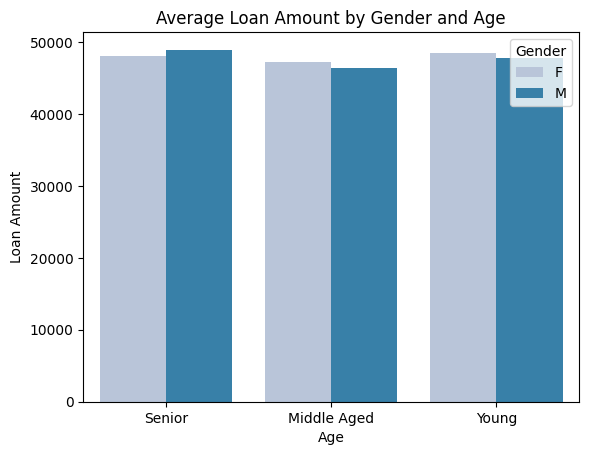

In [45]:
sns.barplot(
    data=data, 
    x='Age', 
    y='Loan Amount', 
    hue='Gender', 
    ci=None,  # Remove error bars if not needed
    palette='PuBu'
)
plt.title("Average Loan Amount by Gender and Age")
plt.show()


<Figure size 1000x600 with 0 Axes>

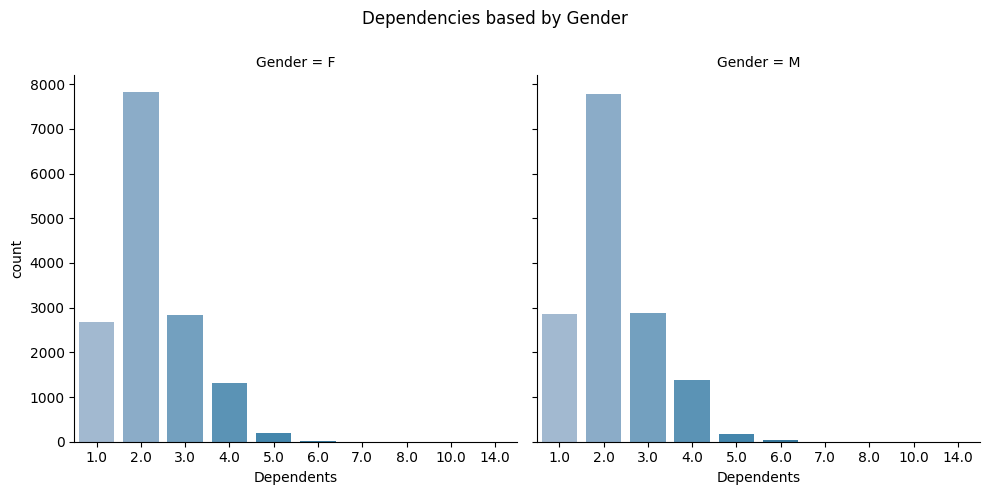

In [46]:
plt.figure(figsize=(10,6))
sns.catplot(data, x = 'Dependents', col = 'Gender', kind="count",  height=5,aspect=1, palette='PuBu_d')
plt.subplots_adjust(top = 0.85)
plt.suptitle("Dependencies based by Gender")
plt.show()

In [50]:
categorical = ['Gender', 'Age', 'Income Stability', 'Approved']
le = LabelEncoder()

for i in categorical: 
    data[i]=le.fit_transform(data[i])
    print(data[i].unique())

[0 1]
[1 0 2]
[1 0]
[1 0]


In [51]:
data['Income Loan Ratio'] = (data['Loan Amount Request'] / data['Property Price'])
data.head(3)

,Gender,Age,Income,Income Stability,Loan Amount Request,Current Loan,Dependents,Credit Score,Co-Applicant,Property Price,Loan Amount,Approved,Income Loan Ratio
0,0,1,1933.05,1,72809.58,241.08,3.0,809.44,1,119933.46,54607.18,1,0.607083
1,1,0,4952.91,1,46837.47,495.81,1.0,780.40,1,54791.00,37469.98,1,0.854839
2,0,1,988.19,0,45593.04,171.95,1.0,833.15,0,72440.58,36474.43,1,0.629385


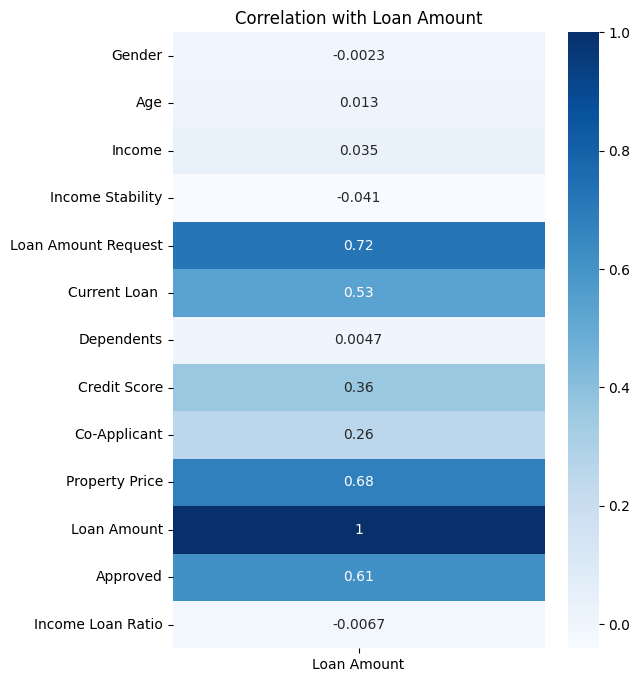

In [52]:
cor_data = data.corr()[['Loan Amount']]
plt.figure(figsize=(6,8))
sns.heatmap(cor_data, annot=True, cmap='Blues', cbar=True)
plt.title('Correlation with Loan Amount')
plt.show()

In [53]:
drop_col = ['Income Loan Ratio','Gender','Dependents']
data.drop(columns=drop_col,inplace=True)
data.head(4)

,Age,Income,Income Stability,Loan Amount Request,Current Loan,Credit Score,Co-Applicant,Property Price,Loan Amount,Approved
0,1,1933.050000,1,72809.58,241.08,809.44,1,119933.46,54607.18,1
1,0,4952.910000,1,46837.47,495.81,780.40,1,54791.00,37469.98,1
2,1,988.190000,0,45593.04,171.95,833.15,0,72440.58,36474.43,1
3,1,2630.574417,0,80057.92,298.54,832.70,1,121441.51,56040.54,1


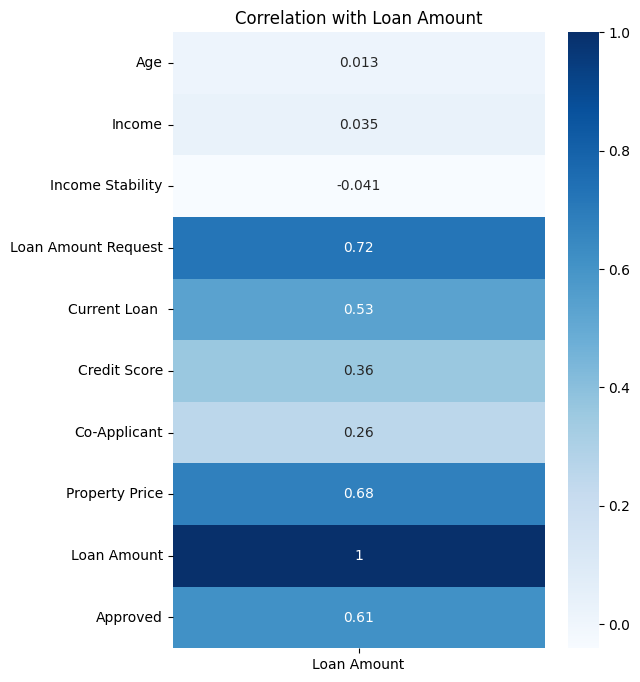

In [54]:
cor_data = data.corr()[['Loan Amount']]
plt.figure(figsize=(6,8))
sns.heatmap(cor_data, annot=True, cmap='Blues', cbar=True)
plt.title('Correlation with Loan Amount')
plt.show()

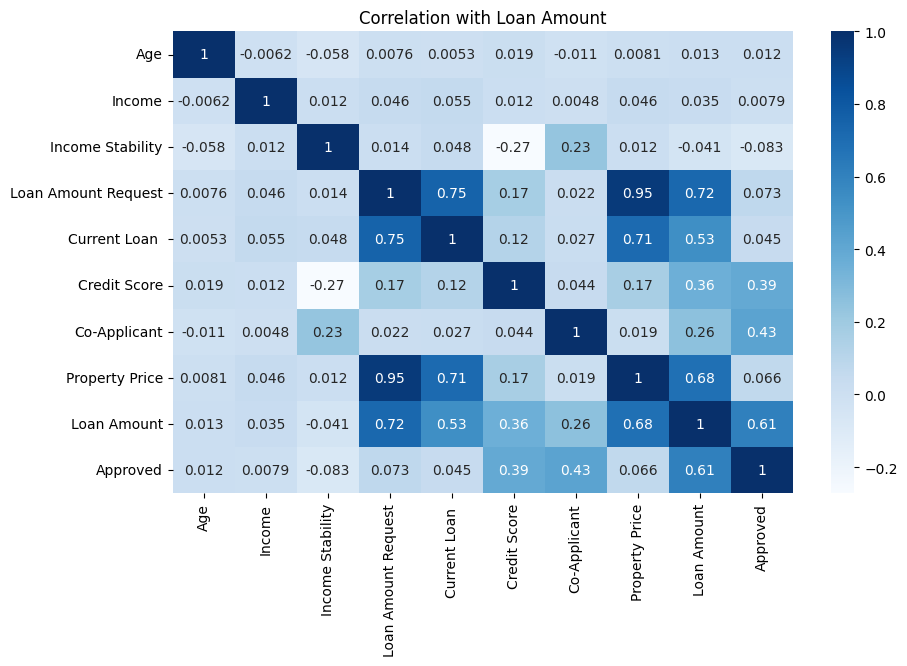

In [55]:
cor_data = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor_data, annot=True, cmap='Blues', cbar=True)
plt.title('Correlation with Loan Amount')
plt.show()

In [56]:
scaling_col =['Income', 'Loan Amount Request',  'Credit Score',  'Property Price']
scaler = MinMaxScaler()


# Apply scaling only to the specified columns
for i in scaling_col: 
    data[i]=le.fit_transform(data[i])
    
# Display the scaled dataset
data.head(4)

,Age,Income,Income Stability,Loan Amount Request,Current Loan,Credit Score,Co-Applicant,Property Price,Loan Amount,Approved
0,1,9122,1,14374,241.08,13663,1,16015,54607.18,1
1,0,23069,1,9113,495.81,11675,1,5908,37469.98,1
2,1,935,0,8812,171.95,15207,0,9248,36474.43,1
3,1,15398,0,16181,298.54,15177,1,16195,56040.54,1


In [59]:
X = data.drop(columns='Loan Amount')
y = data['Loan Amount']
z = data['Approved']

print(X.shape)
print(y.shape)
print(z.shape)

(30000, 9)
(30000,)
(30000,)


In [61]:
X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# List of models and their hyperparameters
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters for LinearRegression
    },
    "DecisionTreeRegressor": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "RandomForestRegressor": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    },
    "XGBRegressor": {
        "model": XGBRegressor(random_state=42, verbosity=0),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    }
}

# Store results
results = {}
best_models = {}

# Train models with GridSearchCV
for model_name, model_info in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(
        estimator=model_info["model"],
        param_grid=model_info["params"],
        scoring='r2',  # Use R² for scoring
        cv=3,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors
    )
    grid_search.fit(X_train, y_train)
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Calculate R² score and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Save results
    results[model_name] = {
        "Best Params": grid_search.best_params_,
        "R² Score": r2,
        "MSE": mse
    }
    
   

# Display the results
results_df = pd.DataFrame(results).T  # Transpose for readability
print("\nModel Evaluation Results:")
print(results_df)

# Find the best-performing model overall
best_model_name = results_df['R² Score'].idxmax()
print(f"\nBest Model Overall: {best_model_name}")


Training LinearRegression...
Training DecisionTreeRegressor...
Training RandomForestRegressor...
Training GradientBoostingRegressor...
Training XGBRegressor...

Model Evaluation Results:
                                                                 Best Params  \
LinearRegression                                                          {}   
DecisionTreeRegressor               {'max_depth': 5, 'min_samples_split': 2}   
RandomForestRegressor      {'max_depth': 10, 'min_samples_split': 10, 'n_...   
GradientBoostingRegressor  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
XGBRegressor               {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   

                           R² Score               MSE  
LinearRegression           0.756325  559896114.695498  
DecisionTreeRegressor       0.97007   68769932.917298  
RandomForestRegressor      0.981856    41690501.11875  
GradientBoostingRegressor  0.982923   39237451.256737  
XGBRegressor               0.980503   44798409.93317

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Step 1: Split the data for classification
X_train_clf, X_test_clf, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

# Step 2: Train a classification model
classification_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

clf_results = {}
best_clf_model = None
best_clf_score = 0

for name, model in classification_models.items():
    print(f"Training {name}...")
    model.fit(X_train_clf, z_train)
    z_pred = model.predict(X_test_clf)
    acc = accuracy_score(z_test, z_pred)
    clf_results[name] = acc
    if acc > best_clf_score:
        best_clf_model = model
        best_clf_score = acc

print("\nClassification Model Accuracy:")
print(clf_results)

# Step 3: Split the data for regression
X_train_reg, X_test_reg, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train regression models
regression_models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42, verbosity=0)
}

reg_results = {}
best_reg_model = None
best_reg_score = -np.inf

for name, model in regression_models.items():
    print(f"Training {name}...")
    model.fit(X_train_reg, y_train)
    y_pred = model.predict(X_test_reg)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    reg_results[name] = {"R² Score": r2, "MSE": mse}
    if r2 > best_reg_score:
        best_reg_model = model
        best_reg_score = r2

print("\nRegression Model Results:")
print(pd.DataFrame(reg_results).T)

# Step 5: Conditional Prediction
final_predictions = []

# Predict classification
z_pred_final = best_clf_model.predict(X_test)

for i, approved in enumerate(z_pred_final):
    if approved == 0:  # Not approved
        final_predictions.append(0)
    else:  # Approved
        # Use regression model for prediction
        reg_pred = best_reg_model.predict([X_test.iloc[i]])
        final_predictions.append(reg_pred[0])

# Calculate final R² score and MSE
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)

print("\nFinal Conditional Model Results:")
print(f"MSE: {final_mse}")
print(f"R² Score: {final_r2}")


Training LogisticRegression...
Training DecisionTreeClassifier...
Training RandomForestClassifier...
Training GradientBoostingClassifier...
Training XGBClassifier...

Classification Model Accuracy:
{'LogisticRegression': 1.0, 'DecisionTreeClassifier': 1.0, 'RandomForestClassifier': 1.0, 'GradientBoostingClassifier': 1.0, 'XGBClassifier': 1.0}
Training LinearRegression...
Training DecisionTreeRegressor...
Training RandomForestRegressor...
Training GradientBoostingRegressor...
Training XGBRegressor...

Regression Model Results:
                           R² Score           MSE
LinearRegression           0.756325  5.598961e+08
DecisionTreeRegressor      0.960850  8.995460e+07
RandomForestRegressor      0.980901  4.388304e+07
GradientBoostingRegressor  0.982458  4.030601e+07
XGBRegressor               0.976451  5.410950e+07

Final Conditional Model Results:
MSE: 39630060.06194778
R² Score: 0.9827524272070479
